In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import shap
from sklearn.metrics import roc_auc_score
from scipy.stats import mstats
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

In [2]:
 from google.colab import files
uploaded = files.upload()

Saving Company_House_Info.csv to Company_House_Info.csv


In [3]:
import io
div = pd.read_csv(io.BytesIO(uploaded['Company_House_Info.csv']))

In [4]:
# Selecting the specified attributes (X1 to X95, plus Y)
required_features = [
    "Bankrupt?",
    " ROA(C) before interest and depreciation before interest",
    " ROA(A) before interest and % after tax",
    " ROA(B) before interest and depreciation after tax",
    " Operating Gross Margin",
    " Realized Sales Gross Margin",
    " Operating Profit Rate",
    " Pre-tax net Interest Rate",
    " After-tax net Interest Rate",
    " Non-industry income and expenditure/revenue",
    " Continuous interest rate (after tax)",
    " Operating Expense Rate",
    " Research and development expense rate",
    " Cash flow rate",
    " Interest-bearing debt interest rate",
    " Tax rate (A)",
    " Net Value Per Share (B)",
    " Net Value Per Share (A)",
    " Net Value Per Share (C)",
    " Persistent EPS in the Last Four Seasons",
    " Cash Flow Per Share"
]
div = div[required_features]

In [5]:
# Overview of the dataset
print("Dataset Shape:", div.shape)

Dataset Shape: (6665, 21)


In [6]:
print(div.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6665 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6665 non-null   float64
 2    ROA(A) before interest and % after tax                   6665 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6665 non-null   float64
 4    Operating Gross Margin                                   6665 non-null   float64
 5    Realized Sales Gross Margin                              6665 non-null   float64
 6    Operating Profit Rate                                    6665 non-null   float64
 7    Pre-tax net Interest Rate                                6665 non-null   float64
 8    After-tax net Int

In [7]:
print(div.describe())

         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6665.000000                                        6665.000000          
mean      0.032858                                           0.505001          
std       0.178279                                           0.060784          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476381          
50%       0.000000                                           0.502511          
75%       0.000000                                           0.535270          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6665.000000   
mean                                  0.558380   
std                                   0.065801   
min                                   0.000000   
25%                          

In [8]:
# Check for missing values
print(div.isnull().sum().sum())  # Ensure no missing values

0


In [9]:
# Rename columns for easier access
div.columns = [col.strip() for col in div.columns]

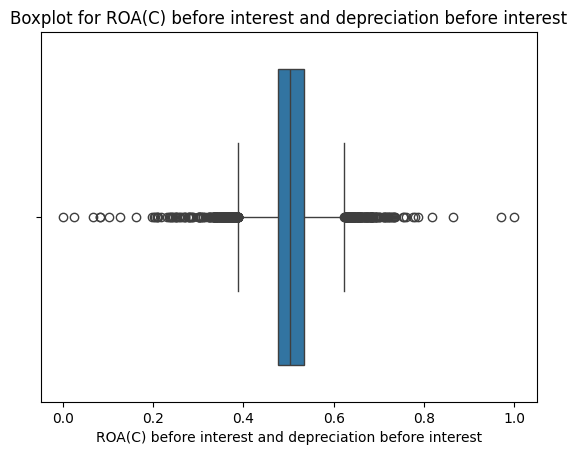

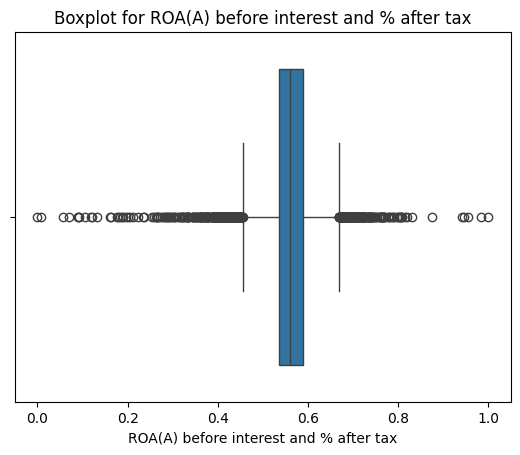

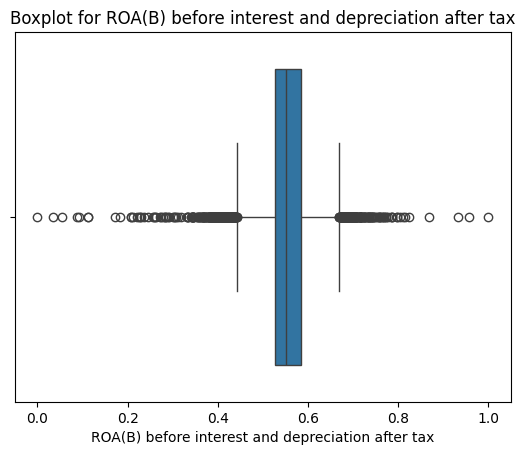

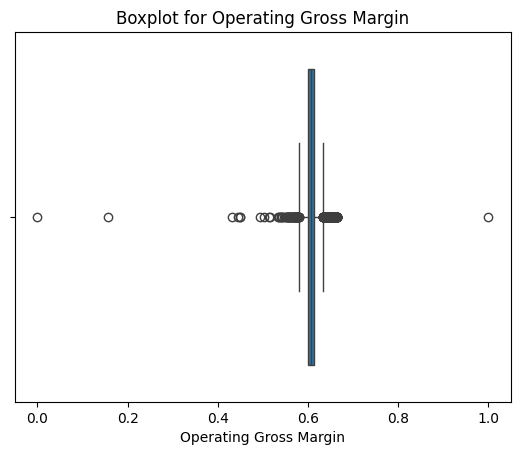

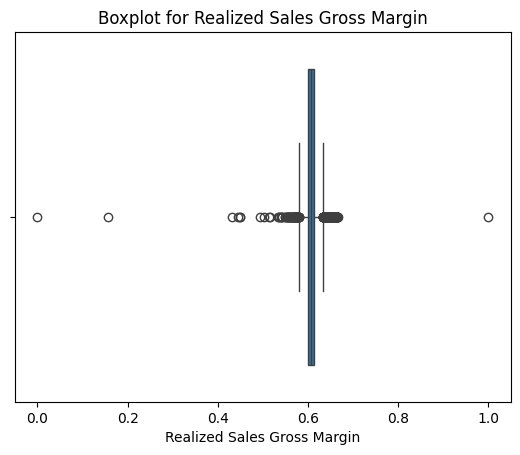

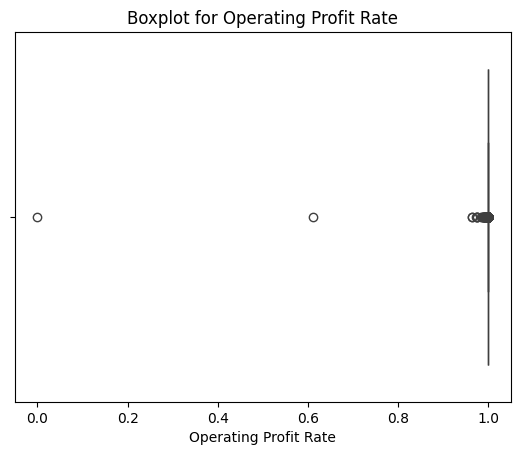

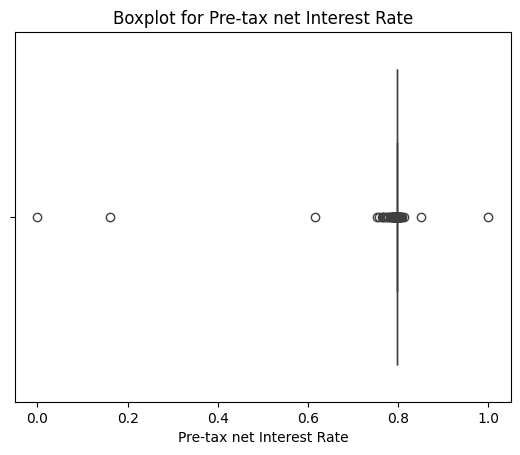

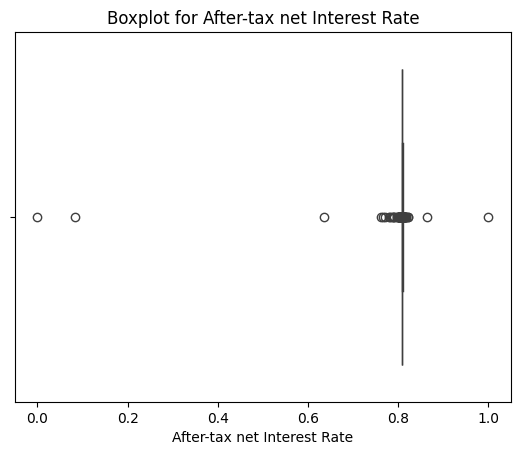

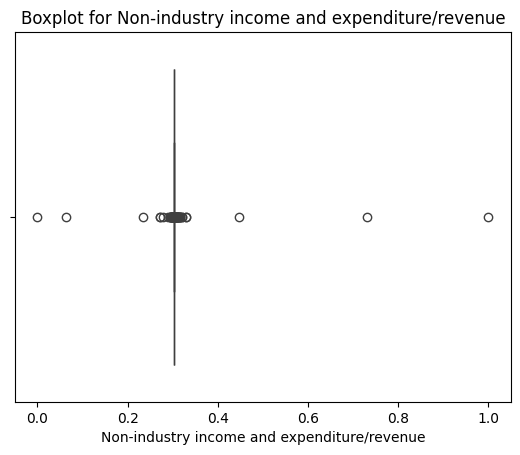

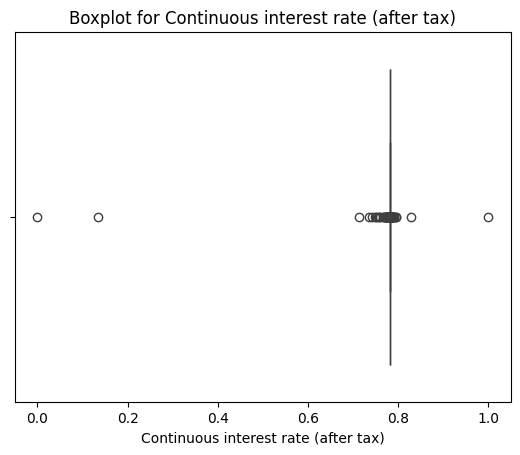

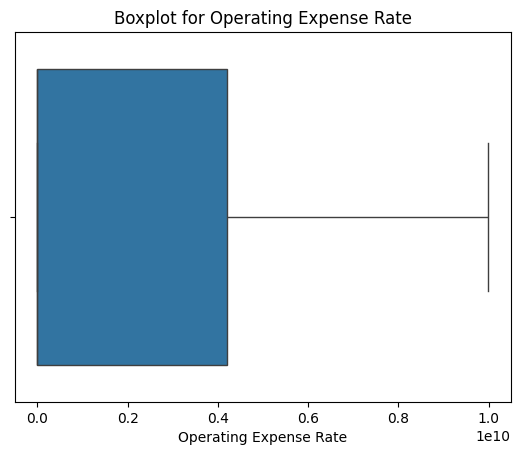

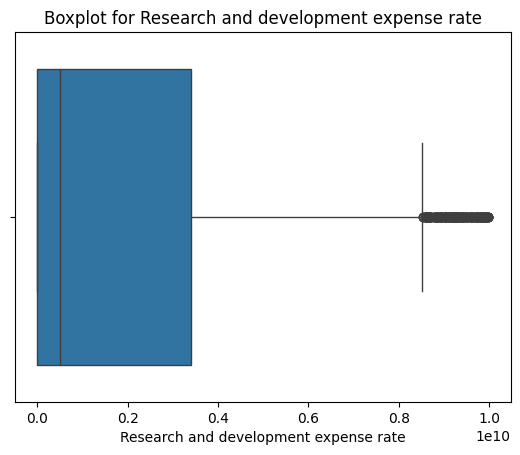

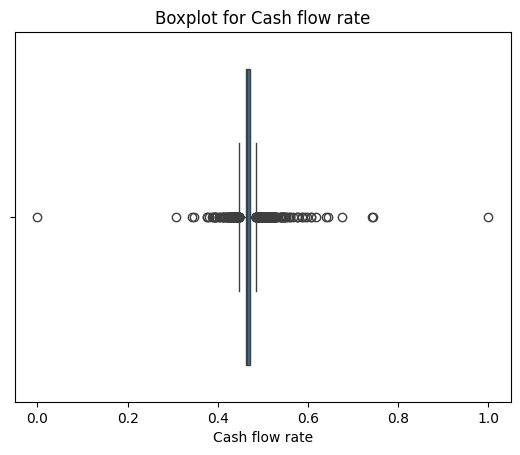

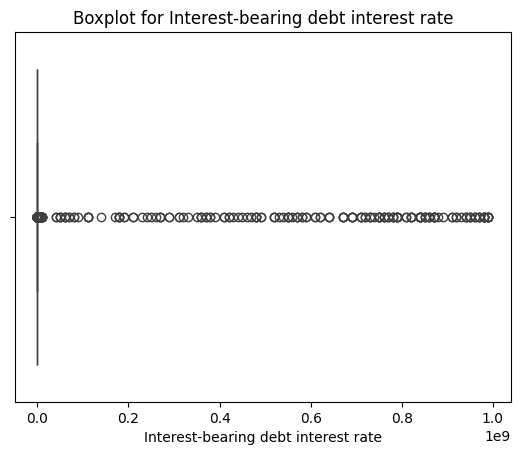

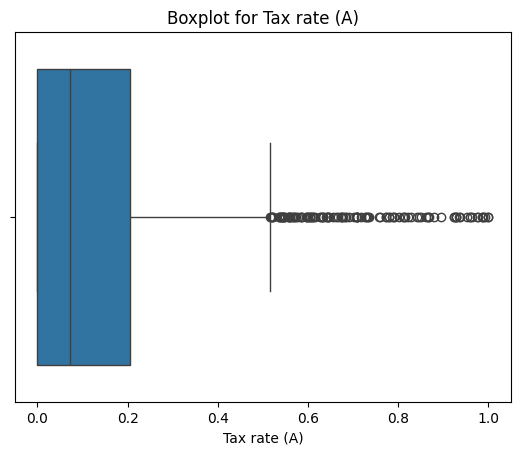

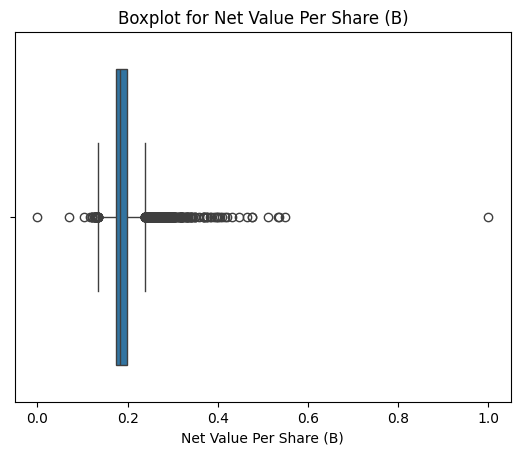

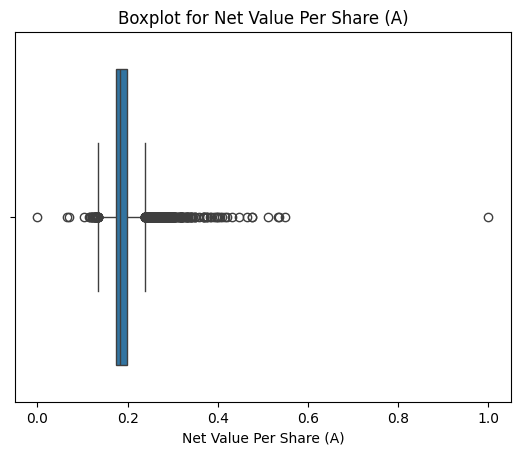

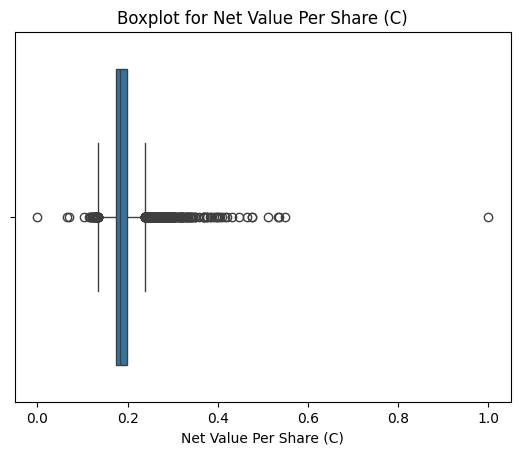

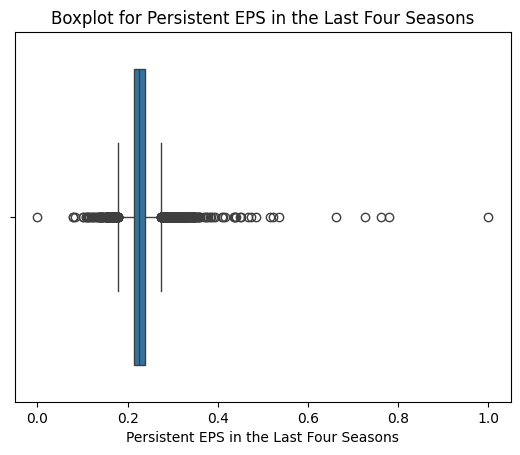

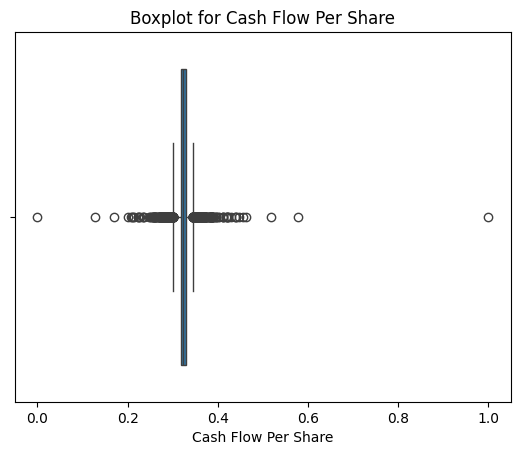

In [12]:
#Outlier Detection and Analysis
X = div.drop(columns=['Bankrupt?'])
for col in X.columns:
    sns.boxplot(x=div[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [14]:
# Saving the original data before any changes
div_original = div.copy()

# Apply Winsorization
from scipy.stats import mstats
for col in div.columns[1:]:  # Assuming the first column is the target or non-numeric
    div[col] = mstats.winsorize(div[col], limits=[0.05, 0.05])

In [15]:
for col in div.columns[1:]:  # Skip the target column
    print(f"{col}:")
    print(f"  5th percentile (original): {div_original[col].quantile(0.05)}")
    print(f"  95th percentile (original): {div_original[col].quantile(0.95)}")
    print(f"  Min after Winsorization: {div[col].min()}")
    print(f"  Max after Winsorization: {div[col].max()}")
    print()

ROA(C) before interest and depreciation before interest:
  5th percentile (original): 0.412772388
  95th percentile (original): 0.6012577391999999
  Min after Winsorization: 0.412762638
  Max after Winsorization: 0.601277239

ROA(A) before interest and % after tax:
  5th percentile (original): 0.456443524
  95th percentile (original): 0.653892281
  Min after Winsorization: 0.456443524
  Max after Winsorization: 0.653892281

ROA(B) before interest and depreciation after tax:
  5th percentile (original): 0.4593500722
  95th percentile (original): 0.6468654638
  Min after Winsorization: 0.459285829
  Max after Winsorization: 0.646876171

Operating Gross Margin:
  5th percentile (original): 0.5939434126
  95th percentile (original): 0.6303578887999999
  Min after Winsorization: 0.59394053
  Max after Winsorization: 0.630370861

Realized Sales Gross Margin:
  5th percentile (original): 0.5939578258
  95th percentile (original): 0.6303348272
  Min after Winsorization: 0.593954943
  Max after

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

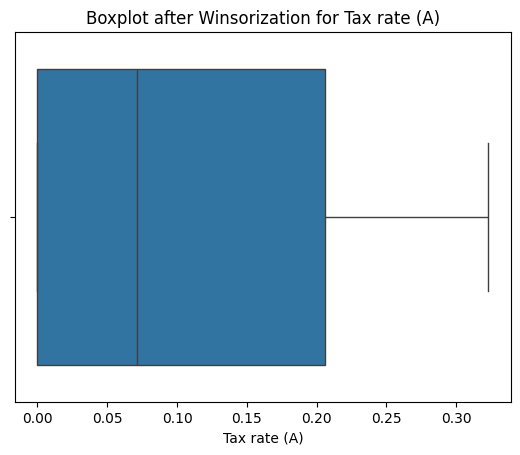

In [16]:

# Example for one column
col = "Tax rate (A)"
sns.boxplot(x=div[col])
plt.title(f"Boxplot after Winsorization for {col}")
plt.show()

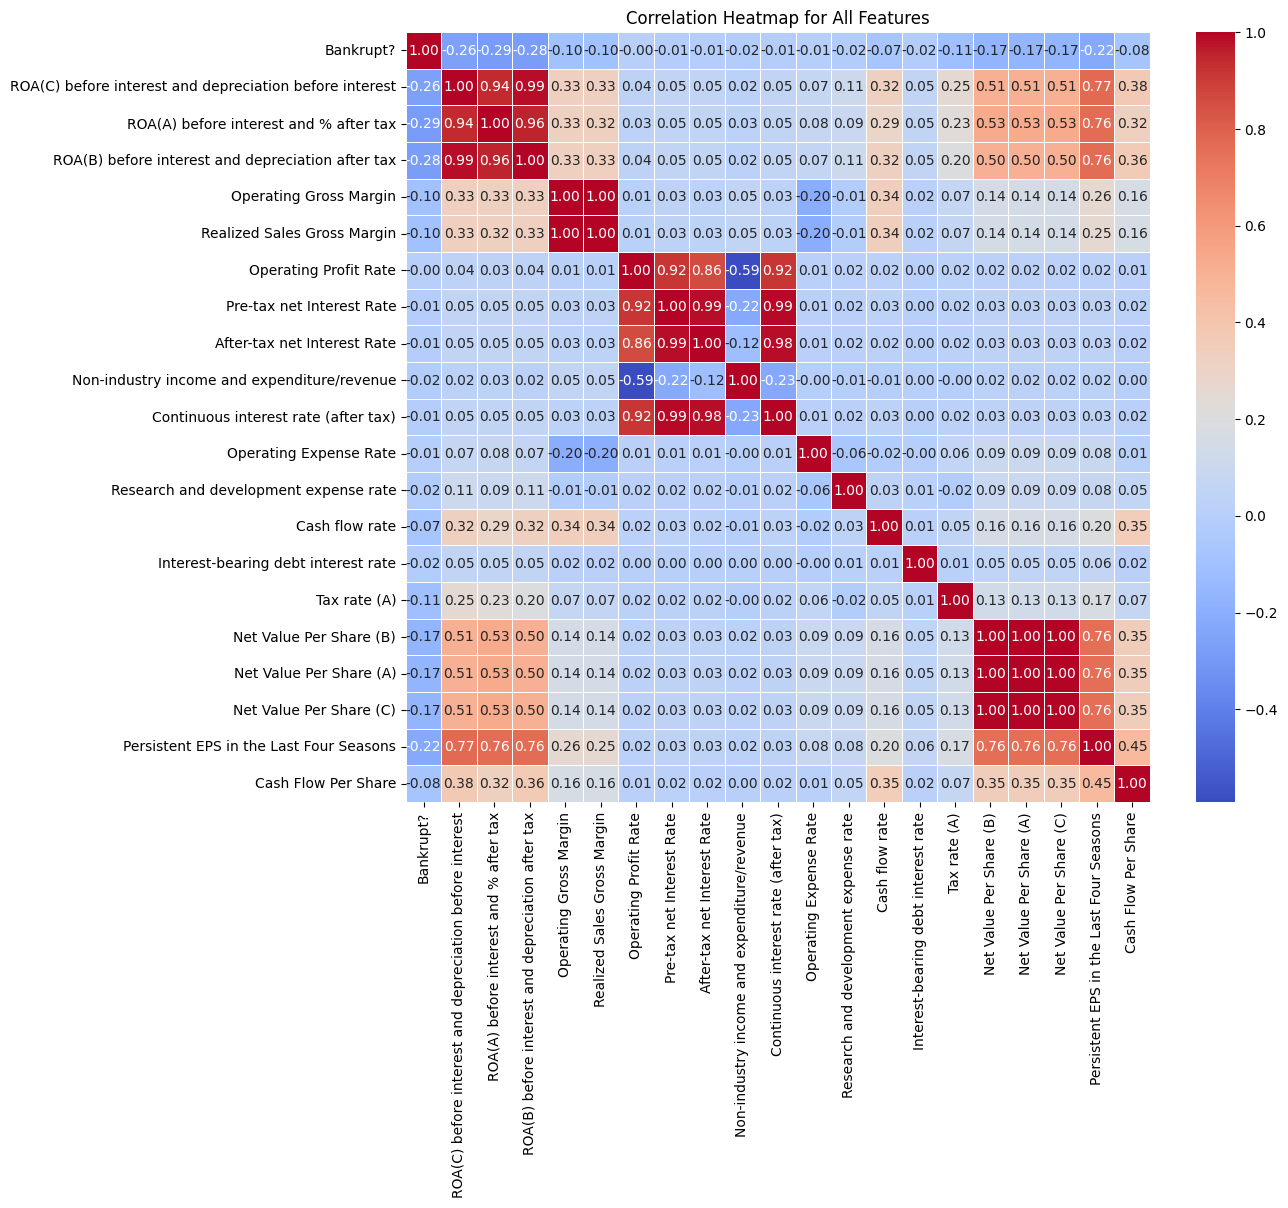

In [ ]:
# correlatoin Analysis heatmap
plt.figure(figsize=(12, 10))
correlation = div.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for All Features")
plt.show()

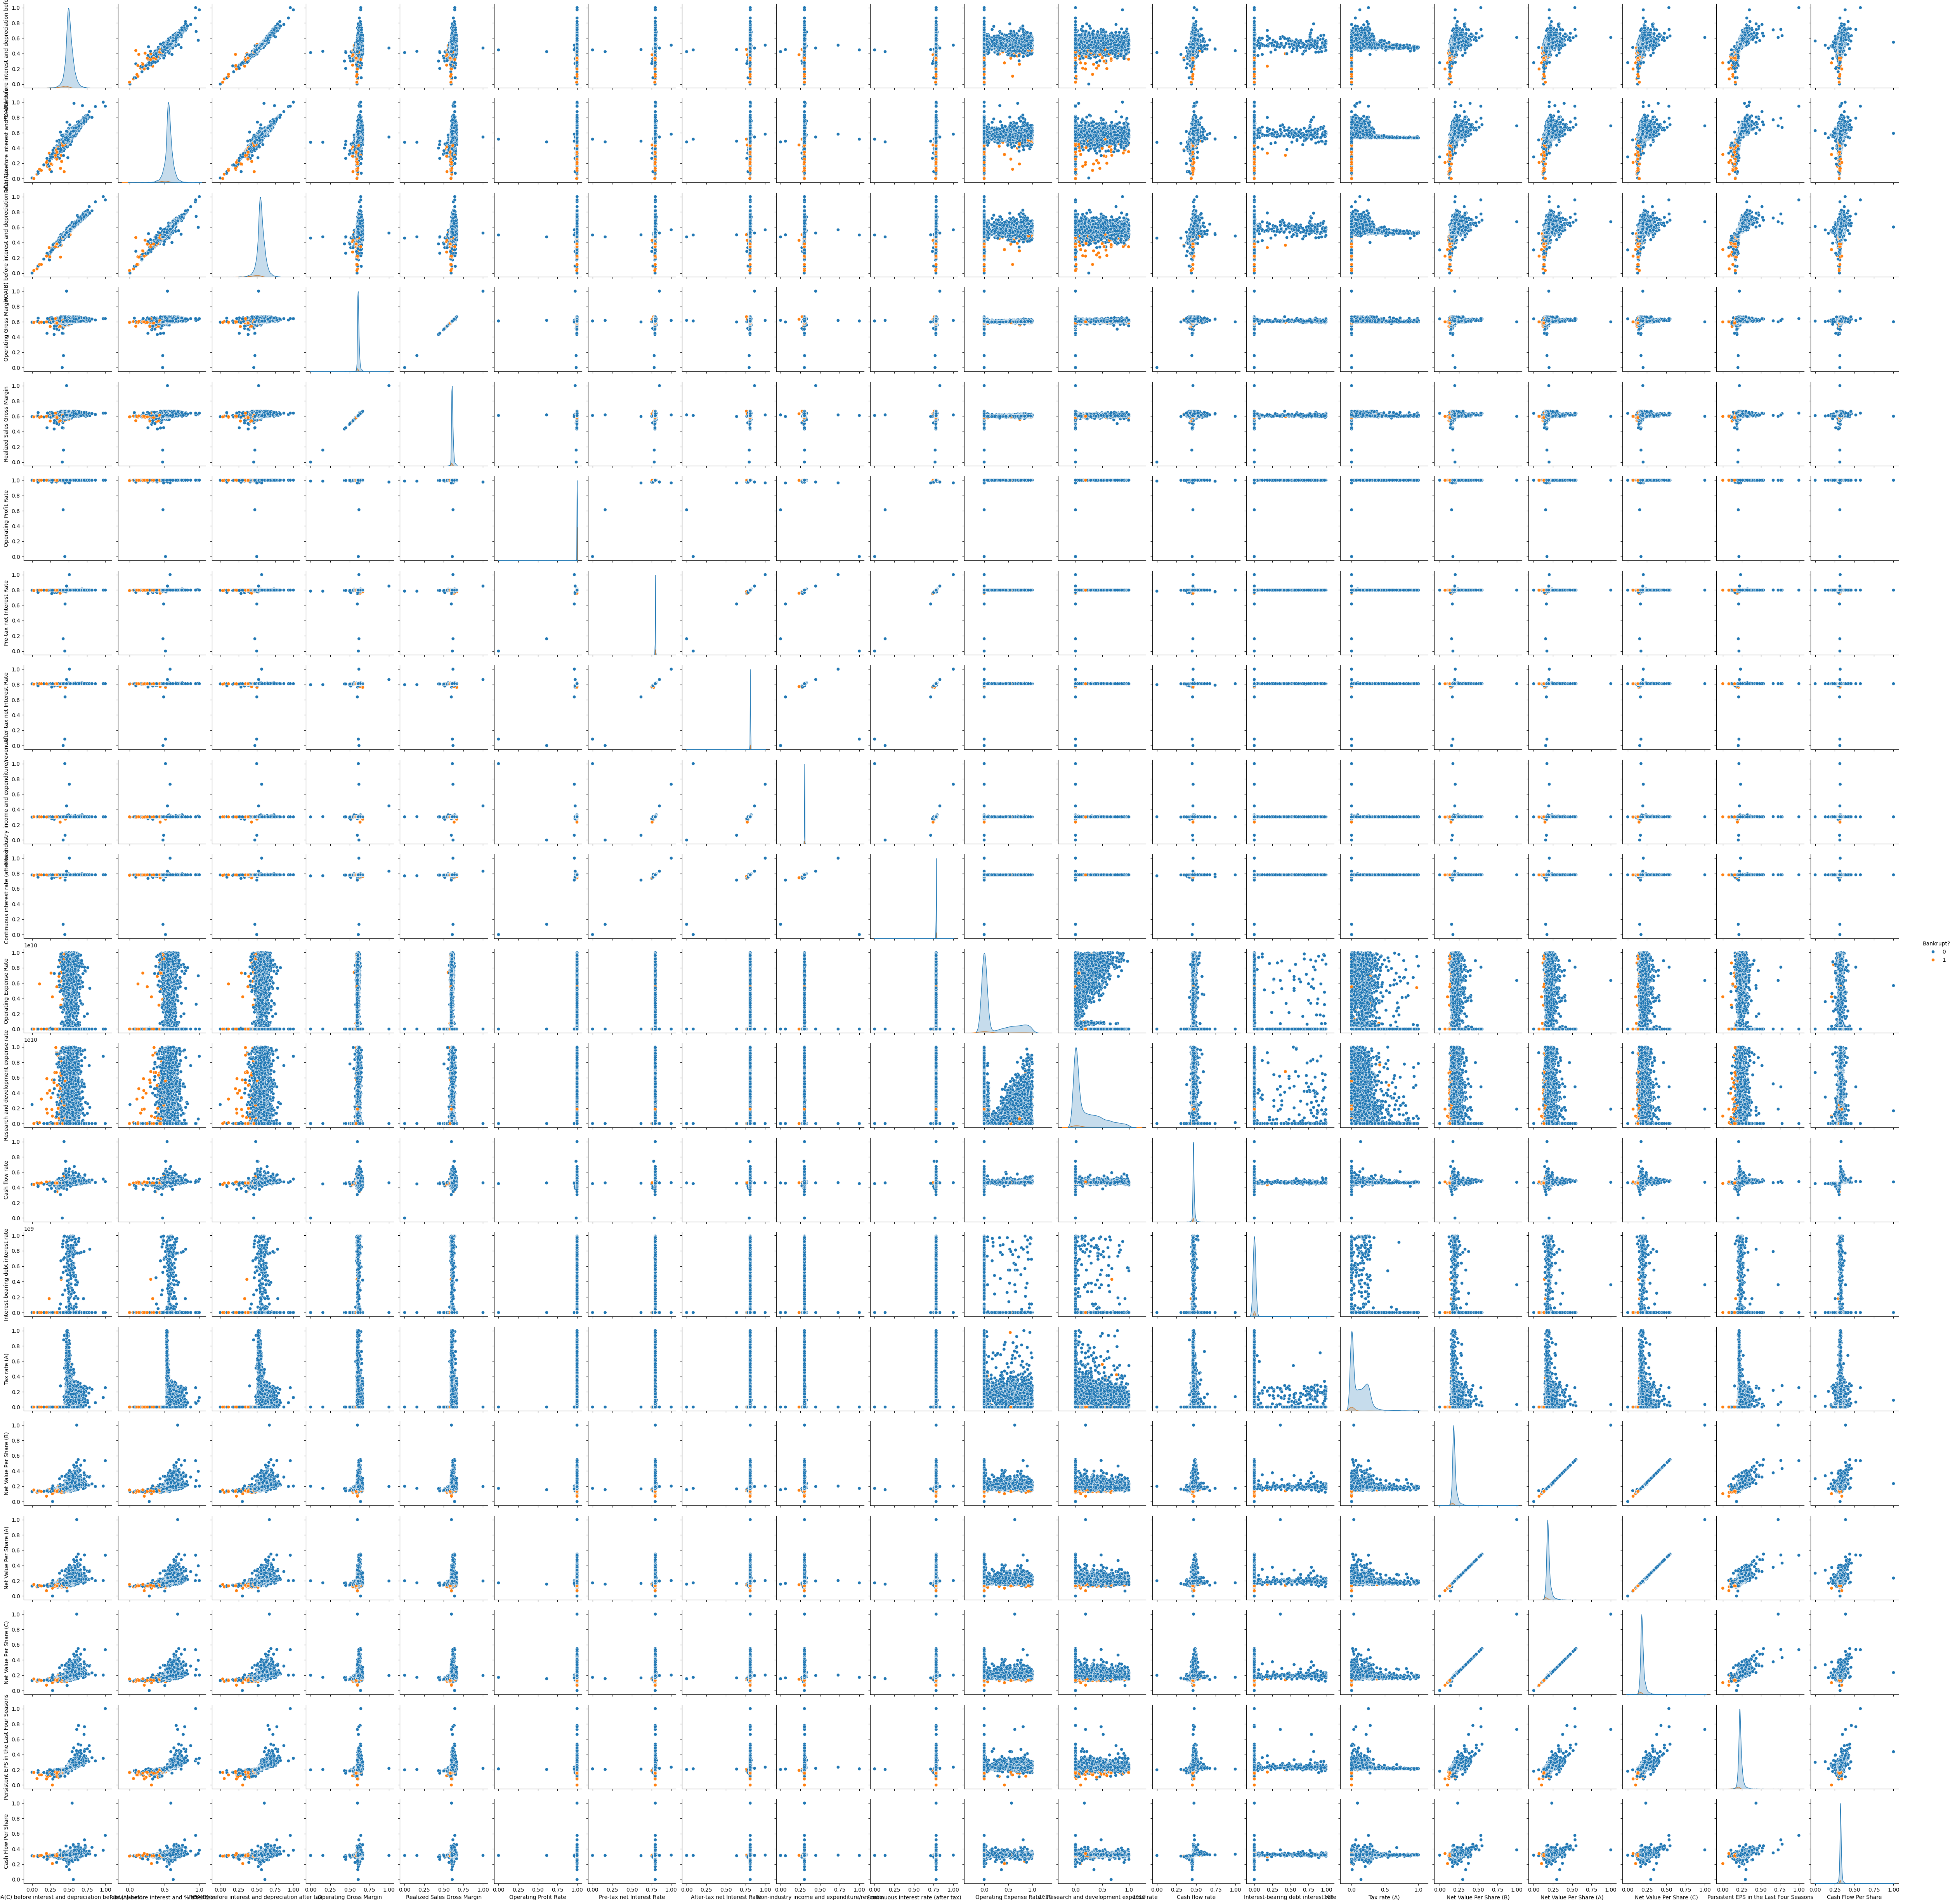

In [ ]:
#Pairwise Feature Analysis
sns.pairplot(div, hue='Bankrupt?', diag_kind='kde')
plt.show()

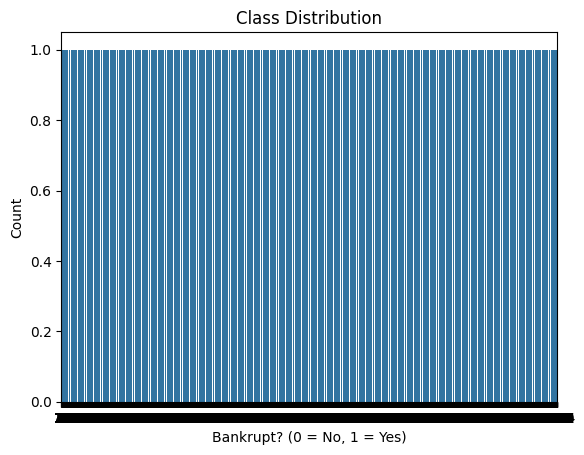

In [10]:
# Check for class imbalance
sns.countplot(div['Bankrupt?'])
plt.title("Class Distribution")
plt.xlabel("Bankrupt? (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<ipython-input-11-ecff57731f24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Blues_d')


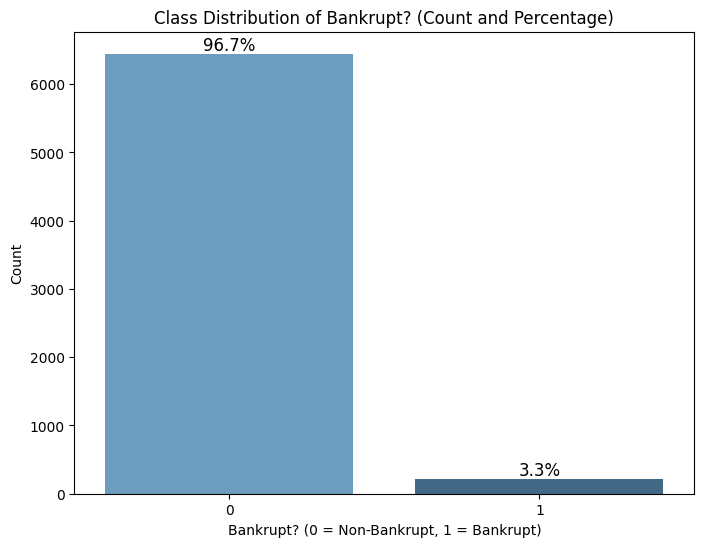

In [11]:
# Bar plot with percentage annotations
class_counts = div['Bankrupt?'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Blues_d')

# Add percentages on top of bars
total = len(div['Bankrupt?'])
for i in range(len(class_counts)):
    plt.text(i, class_counts.values[i] + 50, f'{class_counts.values[i] / total * 100:.1f}%',
             ha='center', fontsize=12)

plt.title("Class Distribution of Bankrupt? (Count and Percentage)")
plt.xlabel("Bankrupt? (0 = Non-Bankrupt, 1 = Bankrupt)")
plt.ylabel("Count")
plt.show()

In [33]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [26]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

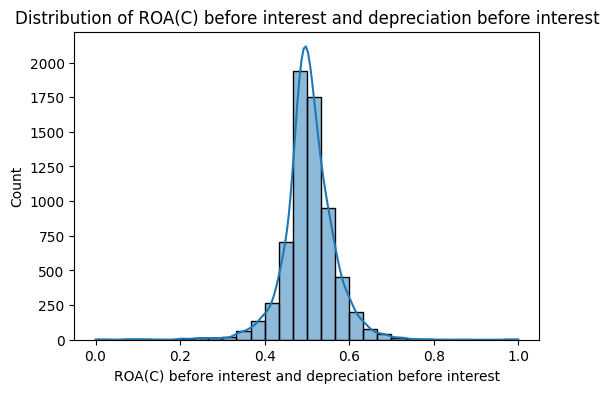

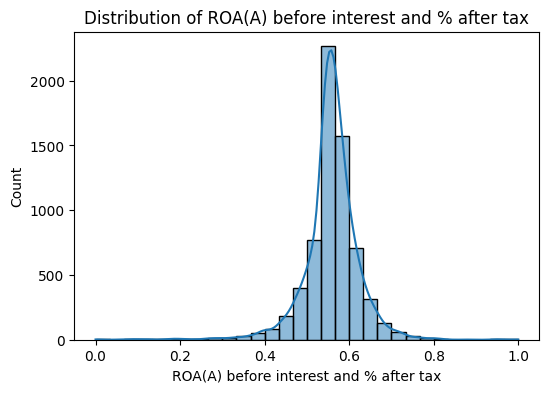

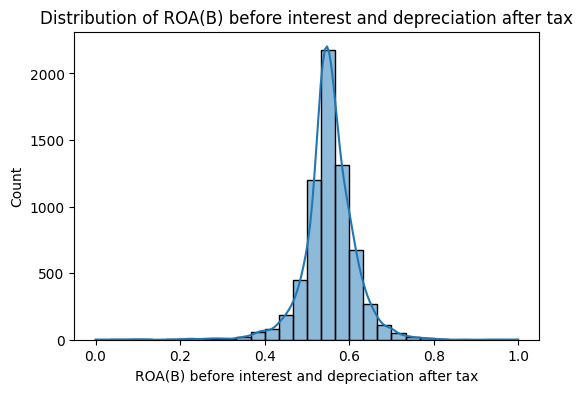

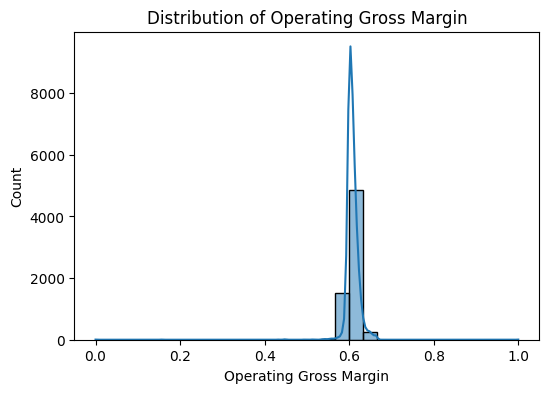

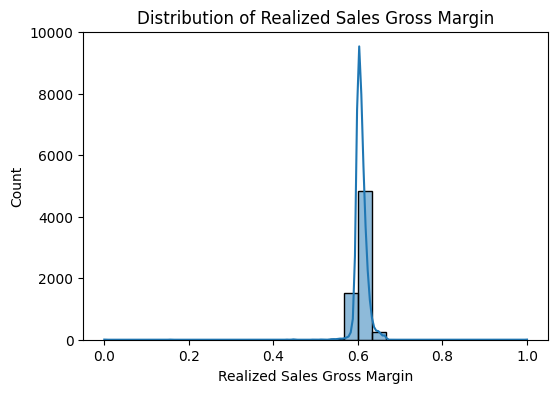

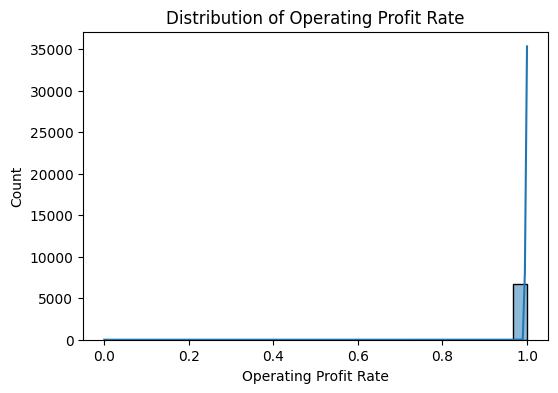

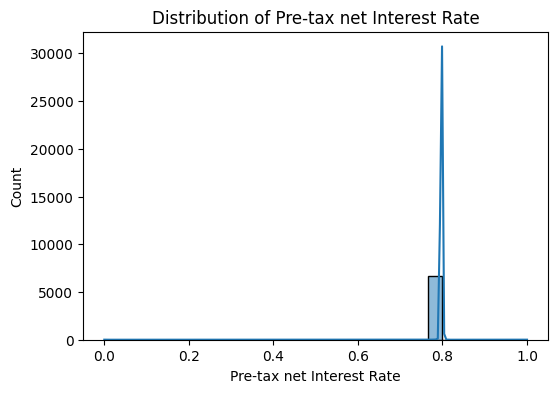

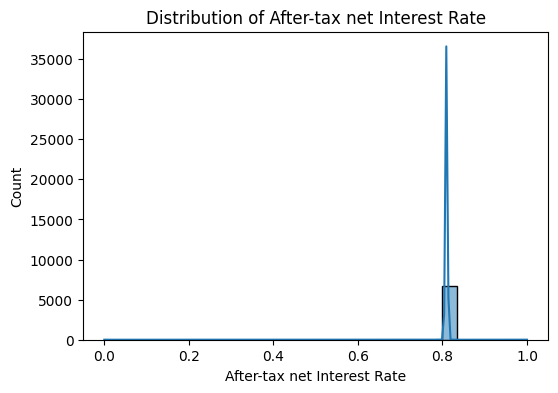

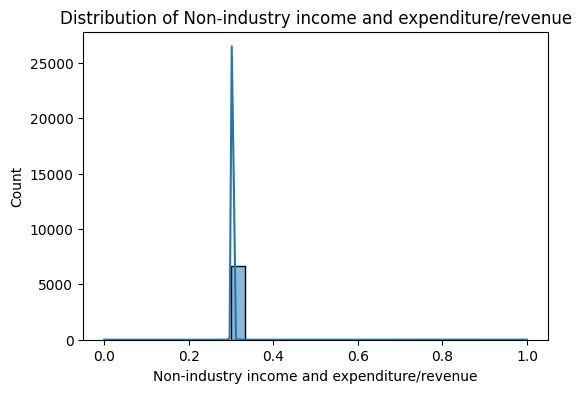

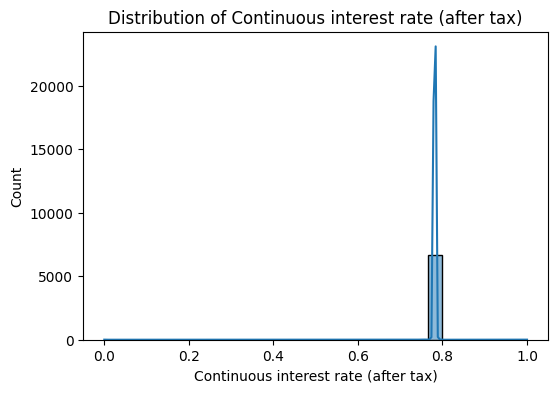

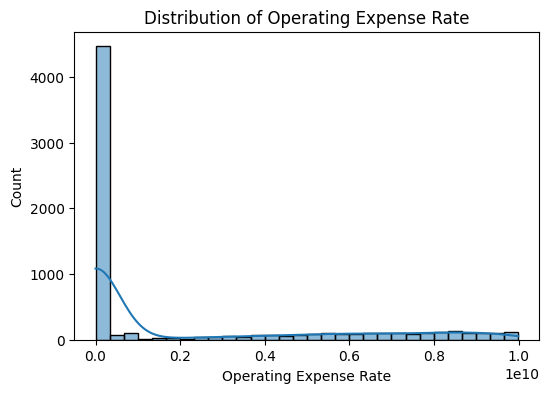

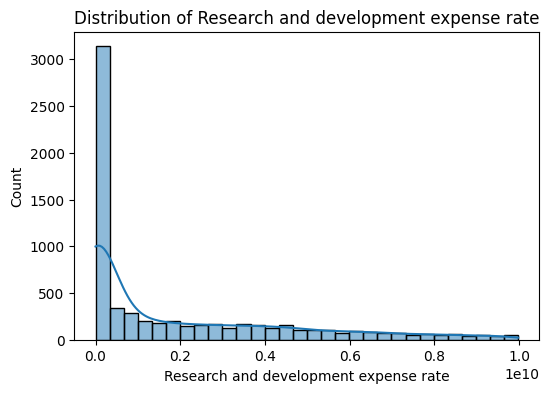

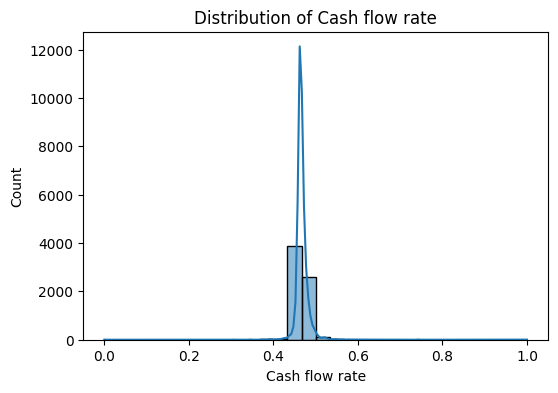

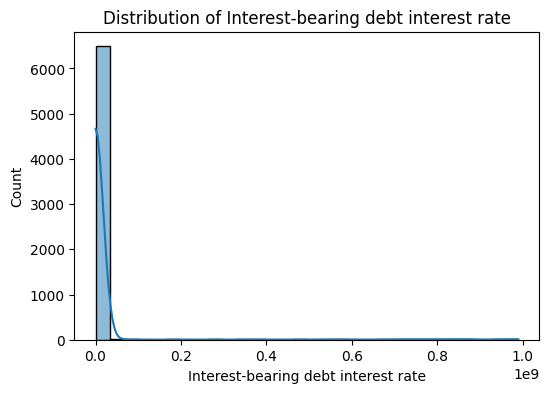

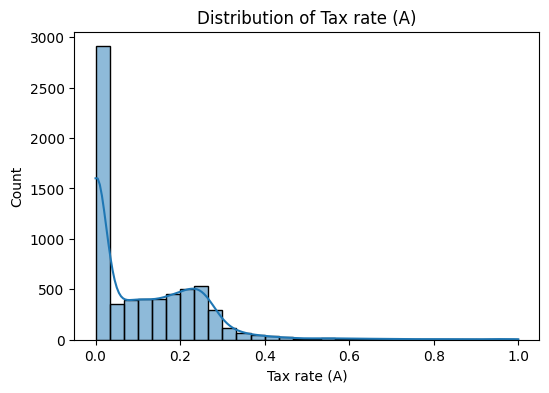

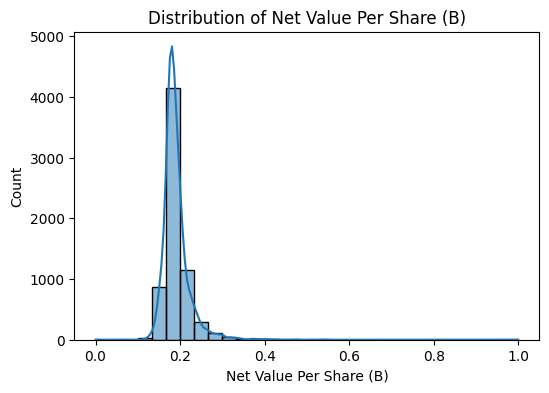

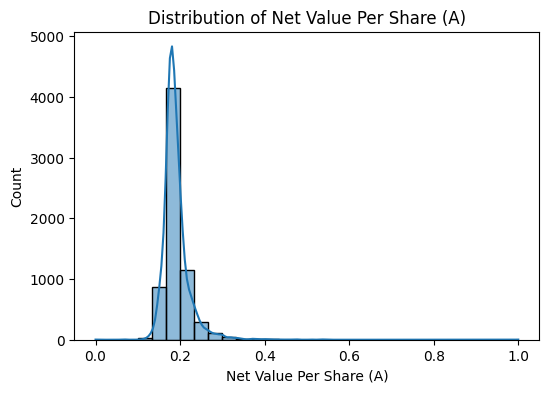

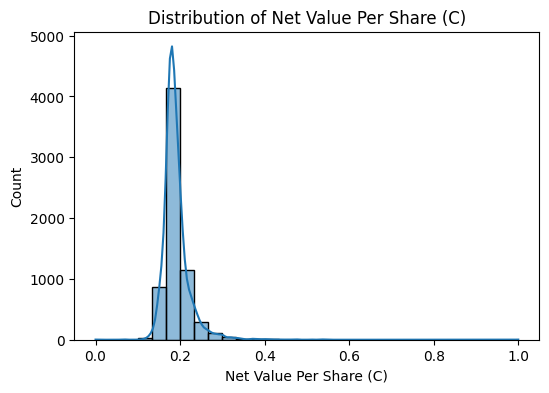

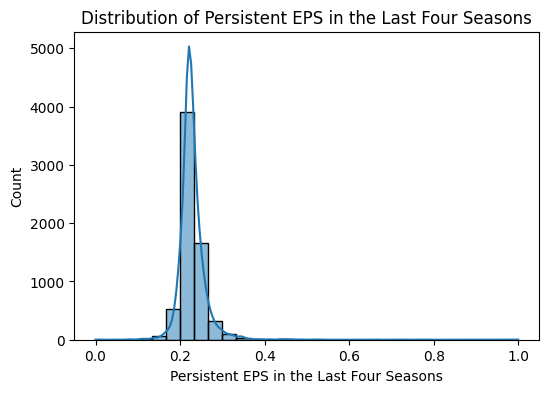

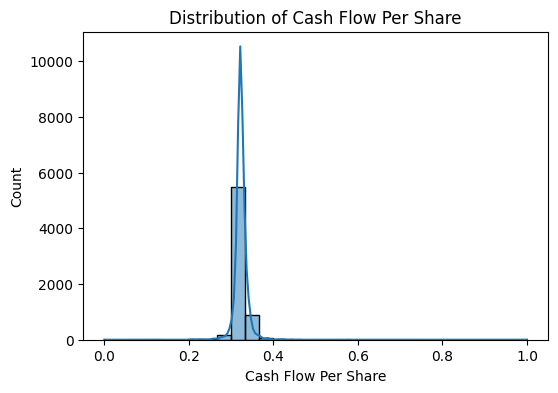

In [10]:
#Distribution of Continuous Features
for col in div.drop(columns=["Bankrupt?"]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(div[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Check for missing values
print("Missing values per column:\n", X.isnull().sum())

Missing values per column:
 ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B)                                  

In [27]:
# Separate features and target variable
X = div.drop(columns=["Bankrupt?"])
y = div["Bankrupt?"]

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [30]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

In [31]:
print(feature_importance_df.head(10))  # Top 10 important features

                                        Feature  Importance
13          Interest-bearing debt interest rate    0.079113
18      Persistent EPS in the Last Four Seasons    0.075018
10                       Operating Expense Rate    0.064360
15                      Net Value Per Share (B)    0.063940
16                      Net Value Per Share (A)    0.056698
8   Non-industry income and expenditure/revenue    0.056305
12                               Cash flow rate    0.055768
17                      Net Value Per Share (C)    0.054960
19                          Cash Flow Per Share    0.054393
1        ROA(A) before interest and % after tax    0.049973


In [18]:
#Feature Importance with Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [32]:
#Hyper parameter Tuning for Random forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

In [34]:
# Random Forest Cross-Validation
scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("Random Forest CV F1-Score:", scores_rf.mean())

Random Forest CV F1-Score: 0.9616739652901473


In [37]:
# Random Forest Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
# Evaluation Metrics for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.93      0.71      1934
           1       0.81      0.30      0.43      1934

    accuracy                           0.61      3868
   macro avg       0.69      0.61      0.57      3868
weighted avg       0.69      0.61      0.57      3868



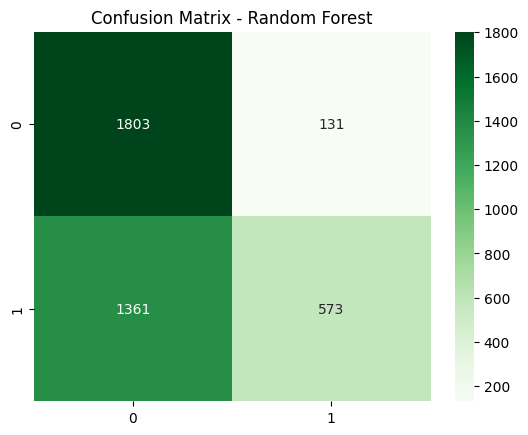

In [39]:
# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

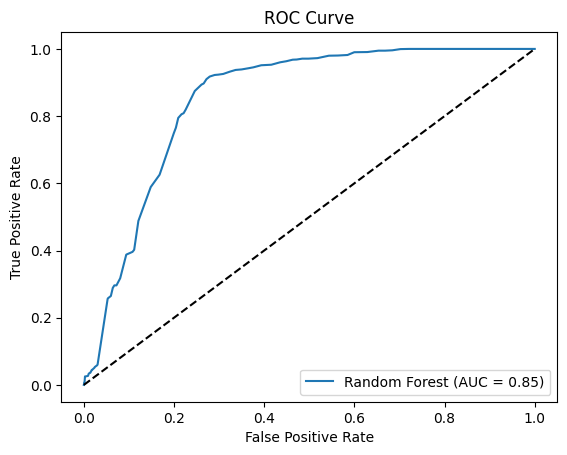

In [40]:
# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [41]:
# Feature Importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

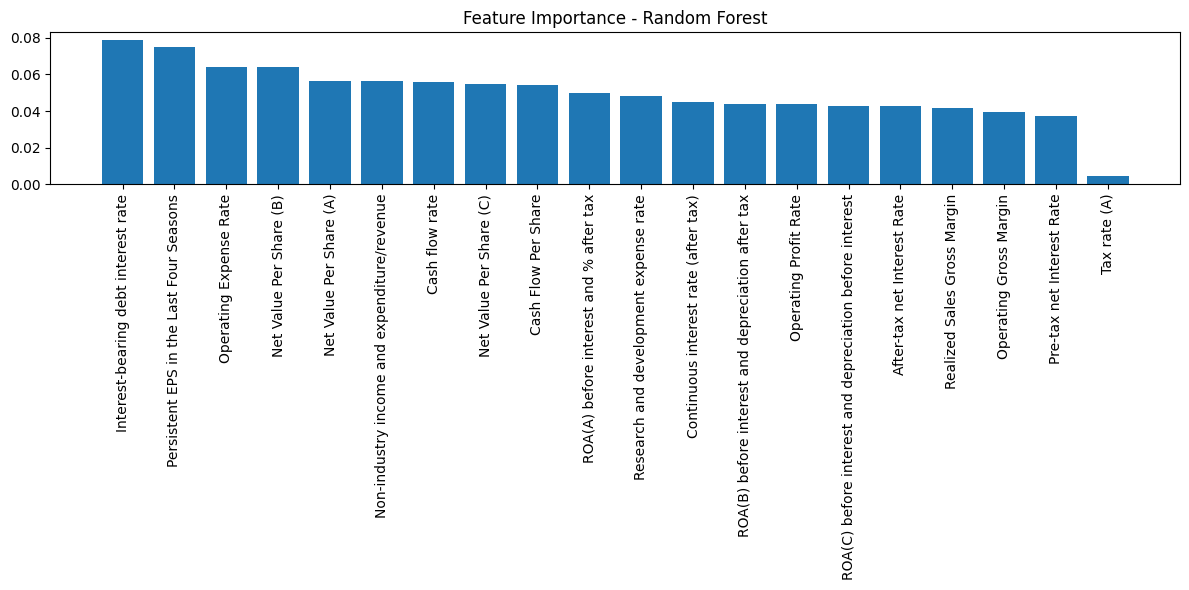

In [42]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

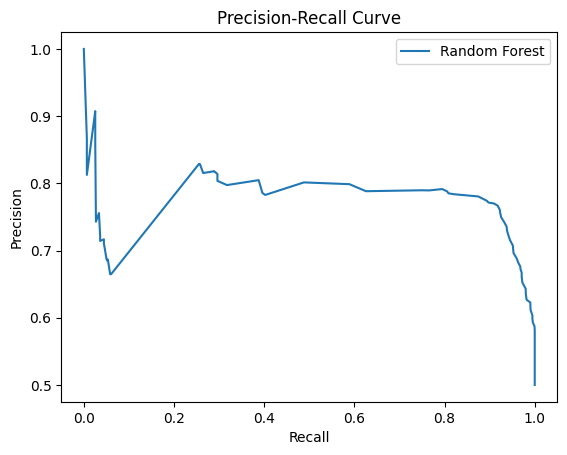

In [43]:
# Precision-Recall Curve for Random Forest
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(recall, precision, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [44]:
# Learning Curve
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, val_mean, 'o-', color="g", label="Validation Score")
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

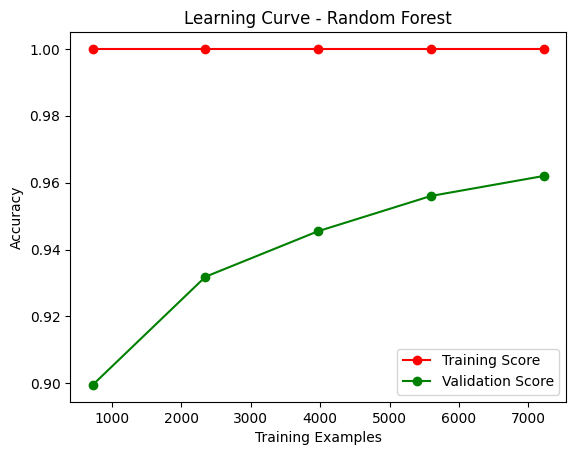

In [47]:
plot_learning_curve(best_rf, "Learning Curve - Random Forest", X_train, y_train)

In [50]:
# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.2f}")

Accuracy for Random Forest: 0.61


In [51]:
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [52]:
# Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

In [53]:
# Logistic Regression Cross-Validation
scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1')
print("Logistic Regression CV F1-Score:", scores_lr.mean())

Logistic Regression CV F1-Score: 0.8598764326481222


In [54]:
# Logistic Regression Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [55]:
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1934
           1       0.85      0.90      0.87      1934

    accuracy                           0.87      3868
   macro avg       0.87      0.87      0.87      3868
weighted avg       0.87      0.87      0.87      3868



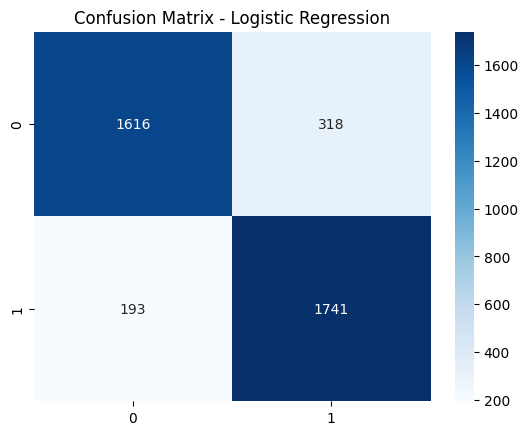

In [56]:
# Confusion Matrix for logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

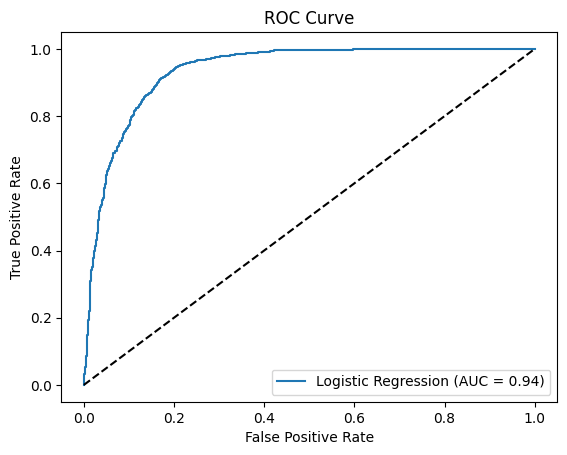

In [57]:
# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [58]:
# Extract coefficients for Feature Importance - Logistic Regression
coefficients = lr.coef_[0]
features = X.columns

In [59]:
# Sort coefficients by magnitude
feature_importance_lr = pd.DataFrame({'Feature': features, 'Importance': abs(coefficients)})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)

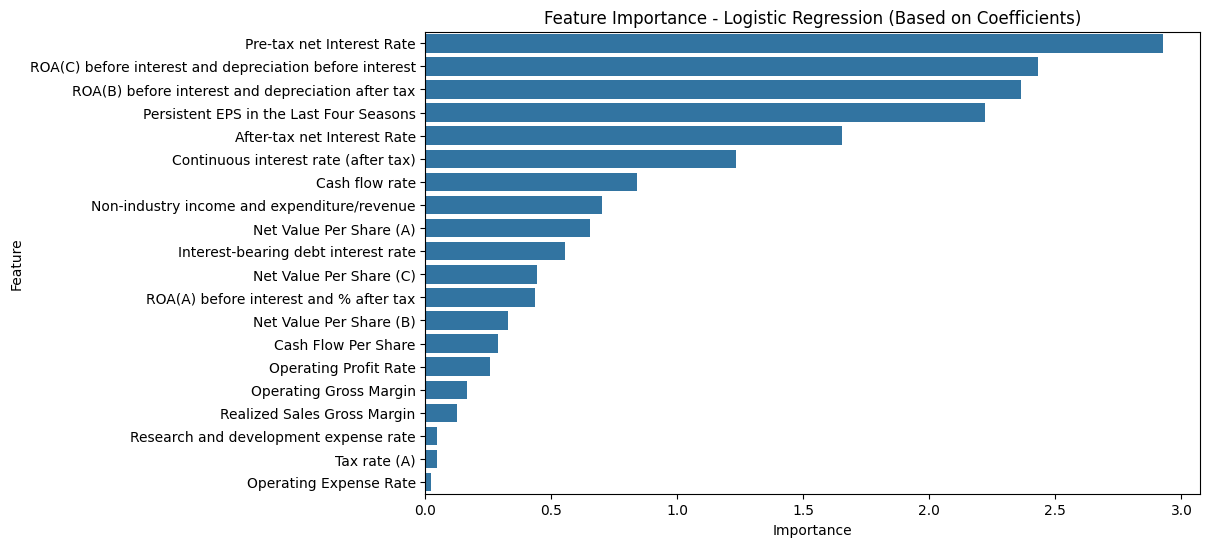

In [60]:
# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_lr)
plt.title('Feature Importance - Logistic Regression (Based on Coefficients)')
plt.show()

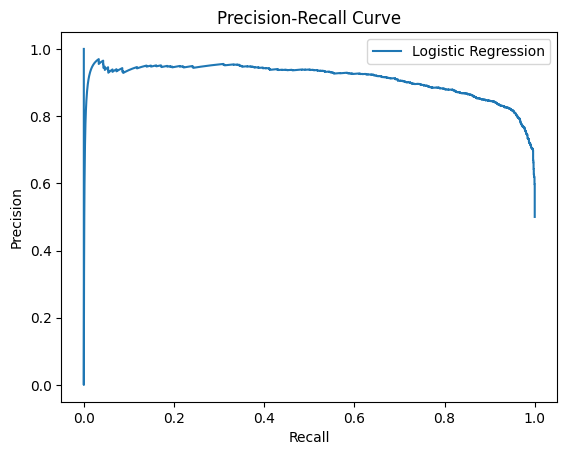

In [61]:
# Precision-Recall Curve for Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
plt.plot(recall, precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

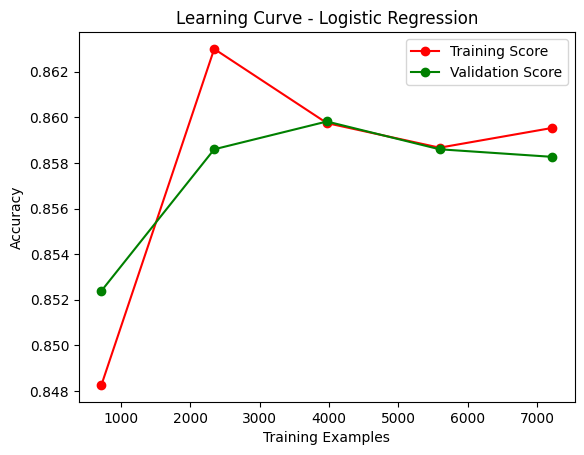

In [62]:
# Learning curve for Logistic Regression
plot_learning_curve(best_lr, "Learning Curve - Logistic Regression", X_train, y_train)


In [63]:
#Accuracy Calculation
from sklearn.metrics import accuracy_score

In [64]:
# Accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy for Logistic Regression: {accuracy_lr:.2f}")

Accuracy for Logistic Regression: 0.87


In [65]:
# F1 Score
from sklearn.metrics import f1_score
f1_lr = f1_score(y_test, y_pred_lr)
f1_rf = f1_score(y_test, y_pred_rf)

In [66]:
  # ROC-AUC Score
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

In [67]:
print(f"F1-Score for Logistic Regression: {f1_lr:.2f}")
print(f"F1-Score for Random Forest: {f1_rf:.2f}")
print(f"ROC-AUC Score for Logistic Regression: {roc_auc_lr:.2f}")
print(f"ROC-AUC Score for Random Forest: {roc_auc_rf:.2f}")

F1-Score for Logistic Regression: 0.87
F1-Score for Random Forest: 0.43
ROC-AUC Score for Logistic Regression: 0.94
ROC-AUC Score for Random Forest: 0.85


In [68]:
# Baseline Model (Always predicts the majority class)
baseline_pred = [0] * len(y_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.50


In [69]:
import joblib

In [70]:
# Save models and scaler
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [71]:
#Report Generation
with open("model_report.txt", "w") as report:
    report.write("Logistic Regression Classification Report:\n")
    report.write(classification_report(y_test, y_pred_lr))
    report.write("\nRandom Forest Classification Report:\n")
    report.write(classification_report(y_test, y_pred_rf))

In [72]:
# Read and display the contents of the file
with open("model_report.txt", "r") as report:
    print(report.read())


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1934
           1       0.85      0.90      0.87      1934

    accuracy                           0.87      3868
   macro avg       0.87      0.87      0.87      3868
weighted avg       0.87      0.87      0.87      3868

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.93      0.71      1934
           1       0.81      0.30      0.43      1934

    accuracy                           0.61      3868
   macro avg       0.69      0.61      0.57      3868
weighted avg       0.69      0.61      0.57      3868

